# 2. logistic_regression（逻辑回归）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report#这个包是评价报告

# 准备数据

In [2]:
#读取、观察原始数据
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()#看前五行

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


d:\software\anaconda\envs\tensorflow\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


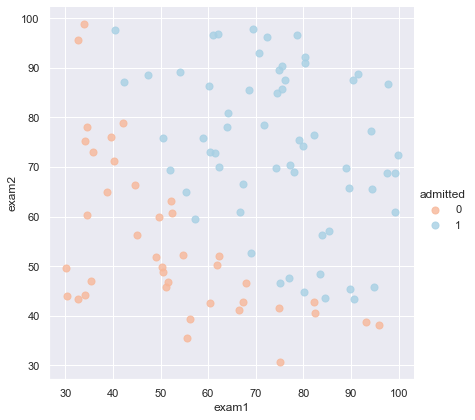

In [4]:
#显示数据概况
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2))#设置背景色、风格、字型、字体等

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
#lmplot用来绘制回归图，通过lmplot可以直观地总览数据的内在关系
#fit_reg表示是否会在图中绘制回归线，而hug表示区分不同数据点类型、从而用不同颜色表示数据点的依据，此处根据数据在admitted列的取值，分为0类和1类
#scatter_kws参数控制颜色，透明度，点的大小，例如{"color":"darkred","alpha":0.3,"s":20}

plt.show()

In [5]:
def get_X(df):#读取特征

    ones = pd.DataFrame({'ones': np.ones(len(df))})#生成一个元素全为1的n维数组ones，并根据此数组生成一个m行1列的dataframe，列名为ones，dateframe名也为ones
    data = pd.concat([ones, df], axis=1)  # 将df与ones两个dataframe合并在一起，根据列合并
    return data.iloc[:, :-1].values  # 取出所有行的、除最后一列外所有列的数据，转换为数组形式返回（最后一列是y，不是特征，所以不取）


def get_y(df):#读取标签

    return np.array(df.iloc[:, -1])#取出所有行的最后一列数据，转换为数组形式返回，也就是y值


def normalize_feature(df):#特征缩放

    return df.apply(lambda column: (column - column.mean()) / column.std())
    #dataframe.apply(function,axis)对一行或一列做出一些操作（axis=1遍历行，axis=0遍历列，默认遍历列）
    #此处就是对DataFrame的每一列（column）中的进行操作，返回每一个column对应的每个值在经过lambda函数处理后得到的新值，再将这些列的新值重新组合成一个DataFrame的对象，作为整个apply方法的返回值返回
    #lambda在这里负责特征缩放，将对于每一列中的每个值，都将其设置为（（原值-该列所有取值的平均值)/该列所有取值的标准差）

In [6]:
X = get_X(data)#读取各样本的各特征并输出，记得提前添加了x0=1这一特征

y = get_y(data)#读取各样本的实际标签并输出

print(X.shape)
print(y.shape)
X

(100, 3)
(100,)


array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

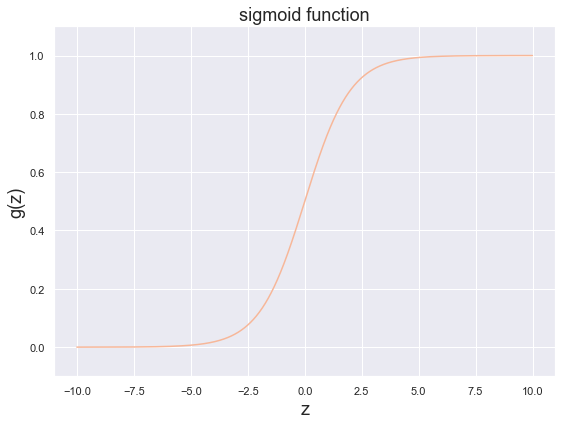

In [8]:
#查看sigmoid函数的概况
fig, ax = plt.subplots(figsize=(8, 6))#子图的大小为16*9
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
#绘图，x轴数据为从-10到10的等差数列，而y轴数据是每个x轴数据所对应的sigmod函数值

ax.set_ylim((-0.1,1.1))#设定y坐标轴的范围
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)#设置X轴变量名、y轴变量名，图像标题名
plt.show()

# cost function(代价函数)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$


In [9]:
#初始化权重矩阵theta
theta=np.zeros(3) #初始化权重theta，特征数共为2+1=3，所以权重theta是个3*1的矩阵
print(theta.shape)
theta

(3,)


array([0., 0., 0.])

In [10]:
def cost(theta, X, y):#一步直接返回损失函数值J（θ），注意这里并不是中间状态cost，其实就是进一步处理cost后得到的最终的J（θ）

    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [11]:
cost(theta, X, y)#在训练之前，权重矩阵theta的值还都是0的时候，先计算最初的损失函数值J（θ）

0.6931471805599453

# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [12]:
def gradient(theta, X, y):#用以上公式计算每个theta的偏导，也就是在一次梯度下降过程中的梯度
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [13]:
gradient(theta, X, y)#在训练之前，权重矩阵theta的值还都是0的时候，先计算最初的梯度，也就是偏导gradient

array([ -0.1       , -12.00921659, -11.26284221])

# 拟合参数
> * 这里我使用 [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 去寻找参数  


In [14]:
import scipy.optimize as opt

In [15]:
#根据优化器一步得出最终优化结果
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

#scipy中的optimize子包中提供了常用的最优化算法函数实现，可以直接调用这些函数完成我们的优化问题
#此处的res只是将优化器函数实例化，并赋予了相应的参数而已，还没有被调用
#func表示待优化的目标函数，此处的目标是找到能使cost的取值最小的一组theta，因此待优化函数为损失函数cost
#x0表示theta的初始值，为全0数组，args表示需要额外传递给优化函数的参数，method表示求解所用的算法，此处为牛顿共轭梯度法
#jac表示最终用来返回梯度向量的函数gradient
#在返回的结果中,x即为优化后的目标数组theta

In [16]:
print(res)

     fun: 0.20349770451259855
     jac: array([1.62947970e-05, 1.11339134e-03, 1.07609314e-03])
 message: 'Optimization terminated successfully.'
    nfev: 71
    nhev: 0
     nit: 28
    njev: 242
  status: 0
 success: True
       x: array([-25.16576744,   0.20626712,   0.20150754])


# 用训练集预测和验证

In [17]:
def predict(x, theta):
    prob = sigmoid(x @ theta)#n*3 @ 3*1 = n*1，也就是求出预测后的具体y值，再将其套入sigmod函数，用来分类
    return (prob >= 0.5).astype(int)#如果prob值>=0.5，则将其视为1，否则为0，用来分类

In [18]:
final_theta = res.x#运行15中定义好的优化器实例后，得到其x值，也就是优化后的权重theta值
y_pred = predict(X, final_theta)#用优化好的权重对x值对应的y进行预测

print(classification_report(y, y_pred))

#sklearn中的classification_report函数用于显示主要分类指标的文本报告．在报告中显示每个类的精确度，召回率，F1值等信息
#主要参数：y_true，即真实y，相当于比较标准；y_pred，即根据模型预测出的值，将其与实际结果进行比较，查看模型效果

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



# 寻找决策边界
http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
> $X \times \theta = 0$  (this is the line)

In [19]:
print(res.x) # 显示模型训练得到的最终theta，训练结束后，theta就不会再变了，变成了模型本身的属性之一

[-25.16576744   0.20626712   0.20150754]


In [20]:
coef = -(res.x / res.x[2])  # find the equation

print(res.x)
print(res.x[2])
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x

#theta内分别是常数项、exam1的系数和exam2的系数，而决策边界是以（theta0 + theta1*x1 + theta2*x2）>=0还是<0作为分界线的
#因此，此处设x2为y，设x1为x，表示出y=...x的表达式，用来在图中划定决策边界，y = x2 = -（theta0 + theta1*x1）/theta2

[-25.16576744   0.20626712   0.20150754]
0.2015075406842107
[124.88747248  -1.02361985  -1.        ]


In [21]:
data.describe()  # 找出x和y的范围

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


> you know the intercept would be around 125 for both x and y

d:\software\anaconda\envs\tensorflow\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


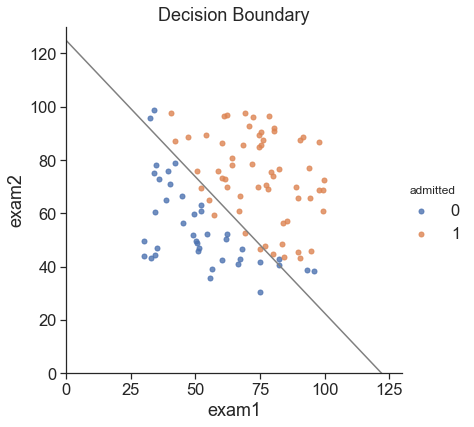

In [22]:
#用直线绘制通过训练好的模型得到的决策边界，观察它与原始数据的拟合情况
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

# 3- 正则化逻辑回归

In [23]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


d:\software\anaconda\envs\tensorflow\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


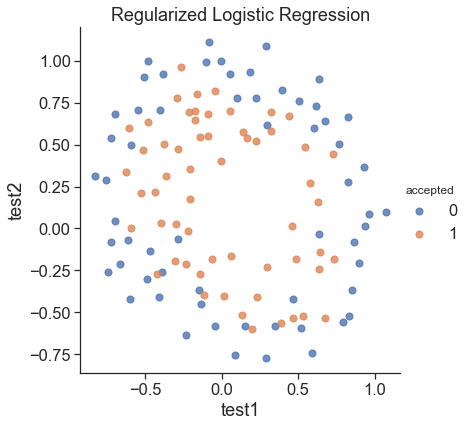

In [24]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

In [25]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

# feature mapping（特征映射）

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="../img/mapped_feature.png">

In [26]:
def feature_mapping(x, y, power, as_ndarray=False):

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }
#使用的是一种格式化字符串的函数 str.format()，通过 {} 和 : 来代替以前的 %
#如输入"{} {}".format("hello", "world")，则相当于不设置指定位置，按默认顺序用后面的字符替换前面的{}，输出则为'hello world'
#此处则是用i-p和p来代替前面两个空字符，组成f-(i-p)-i
#注意，data其实是个字典，其key为f-(i-p)-i，而value则为 np.power(x, i - p) * np.power(y, p)，即x的i-p次方 * y的p次方，i为0-6，而每个i对应的p则为0-i+1
#再结合下方输出即可看出，f00即为x1的0次方*x2的0次方，也就是常数项，f10即为x1的1次方*x2的0次方...
#此操作的意义可以联想上面的特征映射和完全平方公式的计算，为的就是把每组x1和x2的所有可能的幂次组合全都列举出来（共118组x1-x2）

    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [27]:
#把每组x1和x2的所有可能的幂次组合全都列举出来（共118组x1-x2，故为118行）
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [28]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [29]:
theta = np.zeros(data.shape[1])
#得到每组x1和x2的所有可能的幂次组合，共28种组合后，将每种组合的系数都初始化为0，而f00就是指的J（θ）中的常数项，所以不需要特意再添加一个x0列了
print(theta)
print(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
#将dat中的数据以列表形式，而不是dataframe形式存入X
print(X.shape)

y = get_y(df)
print(y.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
28
(118, 28)
(118,)


In [30]:
def regularized_cost(theta, X, y, l=1):#计算正则化损失函数𝐽(𝜃)
    
    theta_j1_to_n = theta[1:]#在正则化中不惩罚常数项，即不惩罚theta0，所以暂时不用添加theta0项，但要删掉f00项，因为它是在写循环时多余的一项，没用
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()#此项是后面多加的正则项，前面的正常项在return时会计算

    return cost(theta, X, y) + regularized_term

In [31]:
regularized_cost(theta, X, y, l=1)
#计算在模型训练以前,初始theta还全为0时的初始损失函数

0.6931471805599454

this is the same as the not regularized cost because we init theta as zeros...
因为我们设置theta为0，所以这个正则化代价函数与代价函数的值相同

# regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [32]:
def regularized_gradient(theta, X, y, l=1):#用以上公式计算每个theta的偏导，也就是在一次梯度下降过程中的梯度，注意在正则化过程中不惩罚theta0

    theta_j1_to_n = theta[1:]#取出目前所有的theta，存入列表theta_j1_to_n，但不要f00项，也就是不惩罚theta0
    regularized_theta = (l / len(X)) * theta_j1_to_n#将theta_j1_to_n内所有元素*(λ/m)

    regularized_term = np.concatenate([np.array([0]), regularized_theta])#用concatenate一次完成多个数组的拼接，其实就是在regularized_theta前面手动加个元素0，代表常数项theta0
    return gradient(theta, X, y) + regularized_term
    
#用以上公式计算每个theta的偏导，原来的部分仍用gradient方法计算，正则化新添加的内容则用regularized_term计算


In [33]:
regularized_gradient(theta, X, y)
#此时还没有训练，所有theta仍全为0，用全0的theta值训练一次，返回训练后的新权重theta

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

# 拟合参数

In [34]:
import scipy.optimize as opt

In [35]:
print('init cost = {}'.format(regularized_cost(theta, X, y)))
#输出在模型训练以前的初始损失函数值
res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=regularized_gradient)


#scipy中的optimize子包中提供了常用的最优化算法函数实现，可以直接调用这些函数完成我们的优化问题
#此处的res只是将优化器函数实例化，并赋予了相应的参数而已，还没有被调用
#func表示待优化的目标函数，此处的目标是找到能使正则化代价函数regularized_cost的取值最小的一组theta，因此待优化函数为regularized_cost
#x0表示theta的初始值，args表示需要额外传递给优化函数的参数，method表示求解所用的算法，此处为牛顿共轭梯度法
#jac表示最终用来返回梯度向量的函数，即regularized_gradient
#在返回的结果中,x即为优化后的目标数组theta

res

init cost = 0.6931471805599454


     fun: 0.529002729712739
     jac: array([ 7.26089191e-08,  4.22913232e-09,  8.15815876e-09,  6.15699190e-08,
        7.74567232e-09, -3.09360466e-08,  2.12821347e-08,  1.22156735e-08,
        1.96058084e-08, -3.19108791e-08, -4.39405717e-09, -2.76847096e-09,
       -2.77934021e-08,  1.23592858e-08, -7.14474161e-08,  8.98276579e-09,
        1.45962365e-08, -1.00120216e-08, -7.32796823e-09,  1.43317535e-08,
       -4.38679455e-08, -4.85023121e-09, -3.40732357e-10, -1.11668147e-08,
       -5.01047274e-09, -1.44326742e-08,  8.78794915e-09, -5.71951122e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 68
  status: 0
 success: True
       x: array([ 1.27273909,  0.62527214,  1.18108783, -2.01995993, -0.91742426,
       -1.43166279,  0.12400726, -0.36553444, -0.35723901, -0.17513021,
       -1.45815774, -0.05098947, -0.61555653, -0.27470644, -1.19281683,
       -0.24218793, -0.20600565, -0.04473137, -0.27778488, -0.2953778 ,
       -0.45

# 预测

In [36]:
final_theta = res.x#将最小化代价函数后得到的theta存入final_theta
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



# 使用不同的 $\lambda$ （这个是常数）
# 画出决策边界
* 我们找到所有满足 $X\times \theta = 0$ 的x
* instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them

In [37]:
def feature_mapped_logistic_regression(power, l):#用来获得模型训练完成后的最终theta值矩阵

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x

    return final_theta

In [38]:
def find_decision_boundary(density, power, theta, threshhold): #训练模型确定theta后，根据theta来画出决策边界线
    t1 = np.linspace(-1, 1.5, density) #创建等差数列，是从-1到1.5的1000个数
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2] #根据1000个t1和1000t2生成平面直角坐标
    x_cord, y_cord = zip(*cordinates) #将其解压，但不再是（x1,y1），（x2，y2）的形式，而是（x1，x2，...）与（y1，y2，...）两个列表，其实就是返回x的所有取值列表和y的所有取值列表
    mapped_cord = feature_mapping(x_cord, y_cord, power) # 因为是在训练模型确定theta后，根据theta来画出决策边界线的，所以不能用训练集中的数据，而是画出新的连续直线，另外mapped_cord是个dataframe

    inner_product = mapped_cord.values @ theta #此为根据新生成的坐标们得到的预测值矩阵

    decision = mapped_cord[np.abs(inner_product) < threshhold]#为矩阵内各个元素值判断它的绝对值是否小于阈值threshhold，保留mapped_cord中所有，其中包含小于阈值threshhold的值的行
    #具体意思看后面，其实就是在1000*1000个数据点中取出所有可以用来画决策边界的那些（新制造的）点们
    return decision.f10, decision.f01
    #取x1的列和x2的列，取出那些符合要求的样本点中的x1值与x2值，在后面用作x与y坐标，用来画图


In [39]:
def draw_boundary(power, l):#最终画图，画出原始数据和模型训练后得出的决策边界，观察训练效果

    density = 1000
    threshhold = 2 * 10**-3#阈值，用来判定决策边界的

    final_theta = feature_mapped_logistic_regression(power, l)#用来获得模型训练完成后的最终theta值矩阵
    x, y = find_decision_boundary(density, power, final_theta, threshhold)#用最终的theta值矩阵来寻找决策边界函数

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

In [40]:
power=6
density=1000
threshhold = 2 * 10**-3
t1 = np.linspace(-1, 1.5, density)#创建等差数列，是从-1到1.5的1000个数
t2 = np.linspace(-1, 1.5, density)

cordinates = [(x, y) for x in t1 for y in t2]#根据1000个t1和1000t2生成平面直角坐标
x_cord, y_cord = zip(*cordinates)#将其解压，但不再是（x1,y1），（x2，y2）的形式，而是（x1，x2，...）与（y1，y2，...）两个列表，其实就是返回x的所有取值列表和y的所有取值列表
mapped_cord = feature_mapping(x_cord, y_cord, power)  
    # 因为是在训练模型确定theta后，根据theta来画出决策边界线的，所以不能用训练集中数据，而是画出新的连续直线，另外mapped_cord是个dataframe

inner_product = mapped_cord.values @ final_theta#此为根据新生成的坐标们得到的预测值矩阵

decision = mapped_cord[np.abs(inner_product) < threshhold]#为矩阵内各个元素值判断它的绝对值是否小于阈值threshhold，保留mapped_cord中所有，其中包含小于阈值threshhold的值的行
print(len(inner_product))
inner_product

1000000


array([ -8.88677027,  -8.85253474,  -8.81854095, ..., -68.25008073,
       -68.53777723, -68.82715756])

In [41]:
np.abs(inner_product) < threshhold

array([False, False, False, ..., False, False, False])

In [42]:
mapped_cord[np.abs(inner_product) < threshhold]

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
139530,1.0,-0.652152,0.326326,0.425302,-0.212814,0.106489,-0.277362,0.138787,-0.069447,0.034750,...,0.014779,-7.395327e-03,3.700501e-03,0.076930,-0.038494,0.019262,-0.009638,4.822878e-03,-2.413290e-03,1.207571e-03
139531,1.0,-0.652152,0.328829,0.425302,-0.214446,0.108128,-0.277362,0.139852,-0.070516,0.035556,...,0.015122,-7.624800e-03,3.844585e-03,0.076930,-0.038790,0.019558,-0.009862,4.972530e-03,-2.507254e-03,1.264210e-03
139532,1.0,-0.652152,0.331331,0.425302,-0.216078,0.109780,-0.277362,0.140916,-0.071594,0.036374,...,0.015470,-7.859573e-03,3.993122e-03,0.076930,-0.039085,0.019857,-0.010089,5.125637e-03,-2.604123e-03,1.323046e-03
139533,1.0,-0.652152,0.333834,0.425302,-0.217710,0.111445,-0.277362,0.141980,-0.072679,0.037204,...,0.015823,-8.099726e-03,4.146214e-03,0.076930,-0.039380,0.020158,-0.010319,5.282254e-03,-2.703963e-03,1.384147e-03
139534,1.0,-0.652152,0.336336,0.425302,-0.219342,0.113122,-0.277362,0.143045,-0.073773,0.038047,...,0.016182,-8.345341e-03,4.303967e-03,0.076930,-0.039675,0.020462,-0.010553,5.442432e-03,-2.806841e-03,1.447581e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696392,1.0,0.741742,-0.019019,0.550181,-0.014107,0.000362,0.408092,-0.010464,0.000268,-0.000007,...,-0.000004,9.705215e-08,-2.488517e-09,0.166539,-0.004270,0.000109,-0.000003,7.198763e-08,-1.845837e-09,4.732915e-11
696447,1.0,0.741742,0.118619,0.550181,0.087984,0.014070,0.408092,0.065262,0.010437,0.001669,...,0.000918,1.468467e-04,2.348358e-05,0.166539,0.026633,0.004259,0.000681,1.089223e-04,1.741875e-05,2.785590e-06
696448,1.0,0.741742,0.121121,0.550181,0.089841,0.014670,0.408092,0.066639,0.010882,0.001777,...,0.000978,1.596365e-04,2.606750e-05,0.166539,0.027195,0.004441,0.000725,1.184091e-04,1.933535e-05,3.157325e-06
696449,1.0,0.741742,0.123624,0.550181,0.091697,0.015283,0.408092,0.068015,0.011336,0.001889,...,0.001039,1.732442e-04,2.887403e-05,0.166539,0.027757,0.004626,0.000771,1.285024e-04,2.141707e-05,3.569512e-06


d:\software\anaconda\envs\tensorflow\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\software\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if sys.path[0] == '':


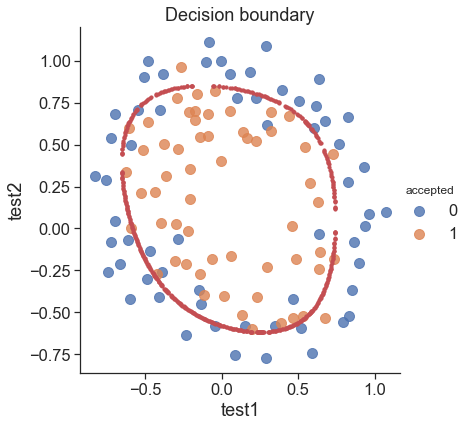

In [43]:
draw_boundary(power=6, l=1)#lambda=1

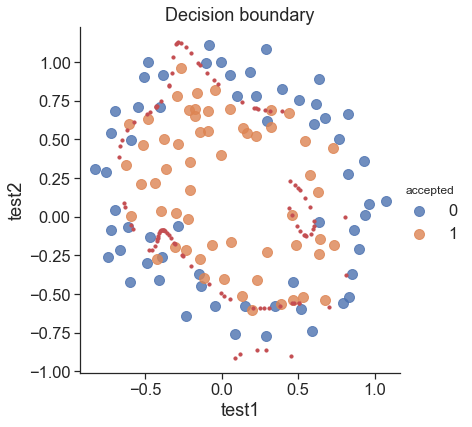

In [44]:
draw_boundary(power=6, l=0)  # no regularization, over fitting，#lambda=0,没有正则化，过拟合了

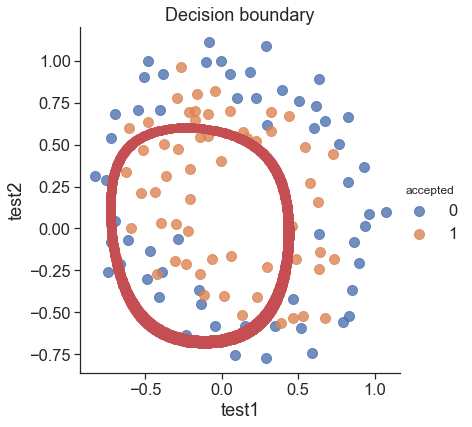

In [45]:
draw_boundary(power=6, l=100)  # underfitting，#lambda=100,欠拟合